## **Import libraries**

In [ ]:
"""
  This part of the code is importing all the necessary libraries and modules for building a Convolutional Neural Network (CNN) using TensorFlow and Keras. It includes libraries for numerical computations, plotting, building the neural network model, defining the layers of the model, optimizing the model, and providing a callback for early stopping during training. This sets up the environment for implementing a CNN for tasks such as image classification.
"""
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model # Importing Sequential and Model from tensorflow.keras.models. Sequential is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor. A Model is like a Sequential, but more general, it can be used to create more complex models.
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Activation, Input, Flatten, Rescaling # Importing various layers from tensorflow.keras.layers. These are the building blocks for constructing a neural network model.
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping # Importing EarlyStopping from tensorflow.keras.callbacks. EarlyStopping is used in Keras to stop training when a monitored metric has stopped improving.

## **Download the dataset**

Download and extract the dataset from the below link in a folder.

https://drive.google.com/file/d/1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P/view?usp=sharing

In [ ]:
# if you are on colab, mount your drive and run this cell, otherwise, do not run this.
%cd drive/MyDrive/Deep_Learning_4021/HW3/

/content/drive/MyDrive/Deep_Learning_4021/HW3


In [ ]:
# unziping dataset.zip to have it extracted so that it can be used
!unzip dataset.zip -d ./dataset

In [ ]:
!ls

dataset  dataset.zip  DL_Q4.ipynb  q3.ipynb


## **Read image files from directory**

To be familiar with keras dataset loading and preprocessing you can use the below link:

https://keras.io/api/preprocessing/image/

Please set ***validation_split = 0.2***

In [ ]:
"""
    This part of the code is using the image_dataset_from_directory function from keras.utils to load a dataset of images from a directory. The images are loaded in grayscale and resized to 128x128. The dataset is shuffled and split into training and validation datasets, with 20% of the data reserved for validation. The function returns two tf.data.Dataset objects: one for the training data and one for the validation data. Each dataset consists of batches of 32 images and their corresponding labels.
"""
train_data, val_data = keras.utils.image_dataset_from_directory(
    "dataset/",  # Specifies the path to the directory where the images are stored.
    labels="inferred",  # Indicates that the labels of the images are inferred from the directory structure of the dataset.
    color_mode="grayscale",  # Specifies that the images should be converted to grayscale.
    batch_size=32,  # Specifies the size of the batches of data (default: 32).
    image_size=(128, 128),  # Specifies the size to which the images will be resized.
    shuffle=True,  # Specifies that the data should be shuffled.
    seed=222,  # Specifies the random seed for shuffling and transformations.
    validation_split=0.2,  # Specifies the fraction of the data to reserve as validation data.
    subset="both"  # Specifies that both training and validation datasets should be returned.
)


Found 3000 files belonging to 2 classes.
Using 2400 files for training.
Using 600 files for validation.


## **Display the dataset**

Plot some samples from the dataset to see and know what are you working with.

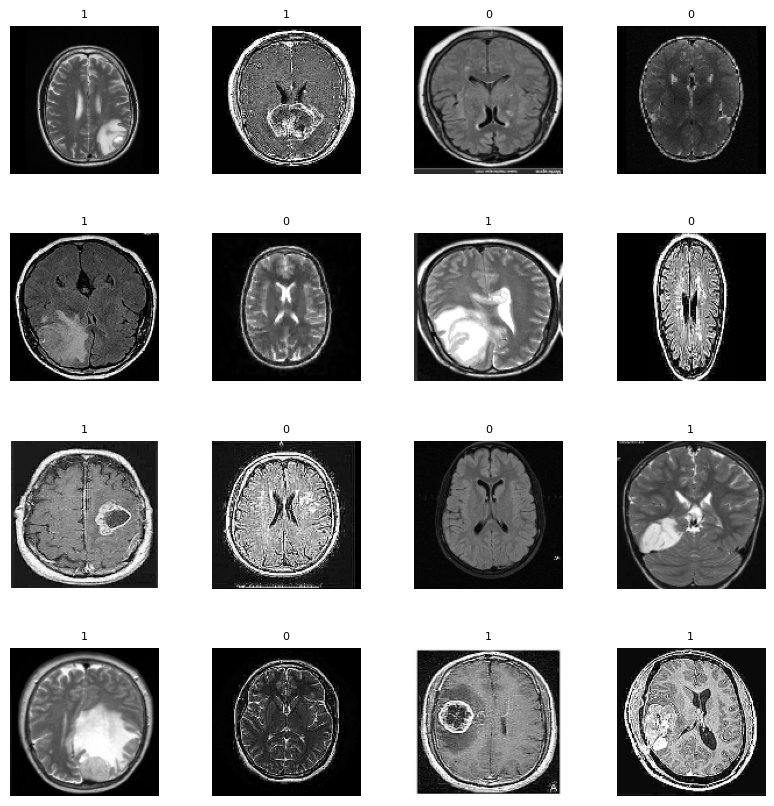

In [ ]:
"""
  This part of the code is visualizing one batch of images from the training dataset. It creates a 4x4 grid of subplots and displays each image in a separate subplot in grayscale. The title of each subplot is set to the label of the corresponding image. The axis for each subplot is turned off for a cleaner look. The space between the subplots is adjusted for better visibility. Finally, the figure with the subplots is displayed.
"""
for images, labels in train_data.take(1):  # This line is taking one batch of images and their corresponding labels from the training dataset.
    W_grid = 4  # This line is setting the width of the plot grid to 4.
    L_grid = 4  # This line is setting the length of the plot grid to 4.

    fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))  # This line is creating a 4x4 grid of subplots with a figure size of 10x10.

    axes = axes.ravel()  # This line is flattening the 4x4 matrix of subplots into a 16-element array.

    batch_size = len(images)  # This line is getting the number of images in the batch.

    for i in np.arange(0, W_grid * L_grid):  # This line is starting a loop over the range from 0 to the number of subplots.
        axes[i].imshow( images[i].numpy().astype("uint8"), cmap="gray" )  # This line is displaying the i-th image in the i-th subplot in grayscale.
        axes[i].set_title( int(labels[i].numpy()), fontsize = 8)  # This line is setting the title of the i-th subplot to the label of the i-th image.
        axes[i].axis('off')  # This line is turning off the axis for the i-th subplot.

    plt.subplots_adjust(hspace=0.4)  # This line is adjusting the space between the subplots.

    plt.show()  # This line is displaying the figure with the subplots.



## **Build the models**

In this section you will build the model with two approaches.
First you should build it with the Sequential API and then you have to work with the Functional API in the second part.

You can use the below link to know more about these two APIs.

Keep the architecture as simple as possible.

https://medium.com/analytics-vidhya/keras-model-sequential-api-vs-functional-api-fc1439a6fb10

## **1.Sequential API**

### **Build a model**

In [ ]:
"""
  This part of the code is defining and compiling a convolutional neural network for binary image classification. The network consists of two convolutional layers (each followed by a max pooling layer), a flatten layer, and two dense layers. The final layer uses a sigmoid activation function for binary classification. The model is compiled with the Adam optimizer and the binary cross-entropy loss function. The accuracy of the model will be monitored during training.
"""
model = Sequential()  # This line is initializing a Sequential model. A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))  # This line is adding a 2D convolution layer to the model. This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. It has 32 filters, each of size 3x3, uses the ReLU activation function, and expects input tensors of shape (128, 128, 1).

model.add(MaxPool2D(pool_size=(2, 2)))  # This line is adding a 2D max pooling layer to the model. Max pooling is a sample-based discretization process that aims to reduce the dimensionality of the input which helps to shorten training time and reduce overfitting. The objective is to down-sample an input representation, reducing its dimensionality and allowing for assumptions to be made about features contained in the sub-regions binned.

model.add(Conv2D(64, (3, 3), activation='relu'))  # This line is adding another 2D convolution layer to the model. This layer has 64 filters, each of size 3x3, and uses the ReLU activation function.

model.add(MaxPool2D(pool_size=(2, 2)))  # This line is adding another 2D max pooling layer to the model.

model.add(Flatten())  # This line is adding a Flatten layer to the model. This layer flattens the multi-dimensional input into a one-dimensional tensor, which can be used by fully connected Dense layers.

model.add(Dense(units=64, activation='relu'))  # This line is adding a Dense layer to the model. This layer implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True). It has 64 units and uses the ReLU activation function.

model.add(Dense(units=1, activation='sigmoid'))  # This line is adding another Dense layer to the model. This layer has 1 unit and uses the sigmoid activation function, making it suitable for binary classification.

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # This line is compiling the model. It sets the optimizer to Adam, the loss function to binary cross-entropy (which is suitable for binary classification), and the metric to accuracy.

model.summary()  # This line is printing a summary of the model, including the number of parameters and the output shape of each layer.

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 57600)             0         
                                                                 
 dense_14 (Dense)            (None, 64)               

### **Train the model**

In [ ]:
"""
    This part of the code is setting up and using early stopping during model training. Early stopping is a form of regularization used to prevent overfitting. It works by monitoring a specified metric (in this case, the validation loss), and stopping the training process if this metric does not improve for a specified number of epochs (in this case, 3). The restore_best_weights option is set to True, meaning that the model weights from the epoch with the best value of the monitored metric are restored at the end of training. The model is then trained on the training data for a maximum of 30 epochs, with the validation data used for validation, and the early stopping callback used to potentially stop training early.
"""
early_stopping = EarlyStopping(
    monitor='val_loss',  # This line is setting the metric to be monitored during training to the validation loss.
    patience=3,  # This line is setting the number of epochs with no improvement after which training will be stopped to 3.
    restore_best_weights=True  # This line is setting the option to restore model weights from the epoch with the best value of the monitored metric to True.
)

history = model.fit(train_data, epochs=30, validation_data=val_data, callbacks=[early_stopping])  # This line is fitting the model to the training data for a maximum of 30 epochs, using the validation data for validation, and using the early stopping callback.

Epoch 1/30
75/75 [==============================] - 8s 75ms/step - loss: 14.7603 - accuracy: 0.7392 - val_loss: 0.3316 - val_accuracy: 0.8483
Epoch 2/30
75/75 [==============================] - 5s 58ms/step - loss: 0.2326 - accuracy: 0.9142 - val_loss: 0.1376 - val_accuracy: 0.9617
Epoch 3/30
75/75 [==============================] - 5s 64ms/step - loss: 0.0843 - accuracy: 0.9750 - val_loss: 0.1281 - val_accuracy: 0.9633
Epoch 4/30
75/75 [==============================] - 6s 77ms/step - loss: 0.0365 - accuracy: 0.9908 - val_loss: 0.1388 - val_accuracy: 0.9533
Epoch 5/30
75/75 [==============================] - 5s 64ms/step - loss: 0.0136 - accuracy: 0.9954 - val_loss: 0.1324 - val_accuracy: 0.9717
Epoch 6/30
75/75 [==============================] - 5s 65ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.1382 - val_accuracy: 0.9750


### **Test the model**

In [ ]:
test_loss, test_accuracy = model.evaluate(val_data)

print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

19/19 [==============================] - 1s 43ms/step - loss: 0.1281 - accuracy: 0.9633
Test loss: 0.12808942794799805
Test accuracy: 0.9633333086967468


### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

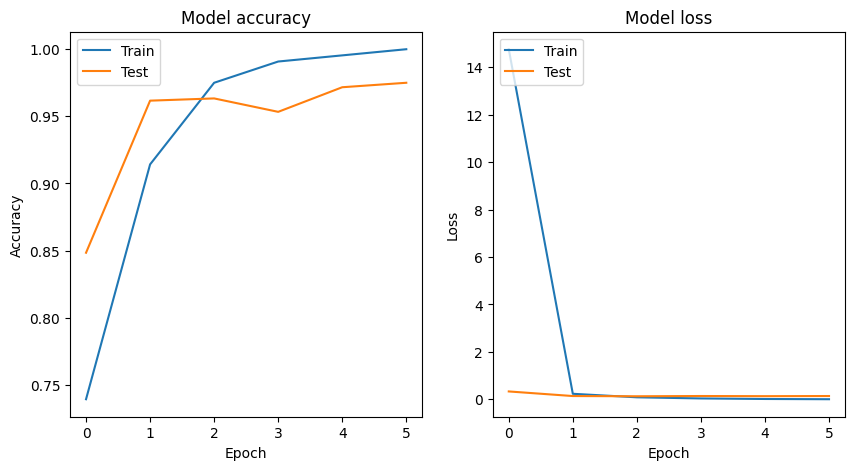

In [ ]:
"""
  This part of the code is visualizing the training and validation accuracy and loss of the model. It creates a figure with two subplots: one for accuracy and one for loss. In each subplot, the training values and validation values are plotted against the epoch number. The subplots are labeled and a legend is added for clarity. Finally, the figure with the subplots is displayed.
"""
history_dict = history.history  # This line is getting the history of the model training, which includes the training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

plt.figure(figsize=(10,5))  # This line is creating a new figure with a specified size.

plt.subplot(1, 2, 1)  # This line is creating the first subplot in a 1x2 grid of subplots.
plt.plot(history_dict['accuracy'])  # This line is plotting the training accuracy values.
plt.plot(history_dict['val_accuracy'])  # This line is plotting the validation accuracy values.
plt.title('Model accuracy')  # This line is setting the title of the subplot to 'Model accuracy'.
plt.ylabel('Accuracy')  # This line is setting the label of the y-axis to 'Accuracy'.
plt.xlabel('Epoch')  # This line is setting the label of the x-axis to 'Epoch'.
plt.legend(['Train', 'Test'], loc='upper left')  # This line is adding a legend to the subplot.

plt.subplot(1, 2, 2)  # This line is creating the second subplot in a 1x2 grid of subplots.
plt.plot(history_dict['loss'])  # This line is plotting the training loss values.
plt.plot(history_dict['val_loss'])  # This line is plotting the validation loss values.
plt.title('Model loss')  # This line is setting the title of the subplot to 'Model loss'.
plt.ylabel('Loss')  # This line is setting the label of the y-axis to 'Loss'.
plt.xlabel('Epoch')  # This line is setting the label of the x-axis to 'Epoch'.
plt.legend(['Train', 'Test'], loc='upper left')  # This line is adding a legend to the subplot.

plt.show()  # This line is displaying the figure with the subplots.


## **2.Functional API**

### **Build a model**

In [ ]:
"""
  This part of the code is defining and compiling a convolutional neural network for binary image classification using the functional API in Keras. The network consists of two convolutional layers (each followed by a max pooling layer), a flatten layer, and two dense layers. The final layer uses a sigmoid activation function for binary classification. The model is compiled with the Adam optimizer and the binary cross-entropy loss function. The accuracy of the model will be monitored during training. The structure of the model is then printed.
"""
input_layer = Input(shape=(128, 128, 1))  # This line is defining the input layer of the model. The shape of the input is (128, 128, 1), which means the model expects input images of size 128x128 with 1 channel (grayscale).

x = Conv2D(32, (3, 3), activation='relu')(input_layer)  # This line is adding a 2D convolution layer to the model. This layer has 32 filters, each of size 3x3, and uses the ReLU activation function.
x = MaxPool2D(pool_size=(2, 2))(x)  # This line is adding a 2D max pooling layer to the model. The pooling operation is applied over a 2x2 window.

x = Conv2D(64, (3, 3), activation='relu')(x)  # This line is adding another 2D convolution layer to the model. This layer has 64 filters, each of size 3x3, and uses the ReLU activation function.
x = MaxPool2D(pool_size=(2, 2))(x)  # This line is adding another 2D max pooling layer to the model.

x = Flatten()(x)  # This line is adding a Flatten layer to the model. This layer flattens the multi-dimensional input into a one-dimensional tensor, which can be used by fully connected Dense layers.

x = Dense(units=64, activation='relu')(x)  # This line is adding a Dense layer to the model. This layer has 64 units and uses the ReLU activation function.
output_layer = Dense(units=1, activation='sigmoid')(x)  # This line is adding another Dense layer to the model. This layer has 1 unit and uses the sigmoid activation function, making it suitable for binary classification.

func_model = Model(input_layer, output_layer)  # This line is creating the model. The Model class is used to define the model, with the input layer and output layer as arguments.

func_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # This line is compiling the model. It sets the optimizer to Adam, the loss function to binary cross-entropy (which is suitable for binary classification), and the metric to accuracy.

func_model.summary()  # This line is printing a summary of the model, including the number of parameters and the output shape of each layer.

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_16 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 57600)             0   

### **Train the model**

In [ ]:
"""
    This part of the code is setting up and using early stopping during model training. Early stopping is a form of regularization used to prevent overfitting. It works by monitoring a specified metric (in this case, the validation loss), and stopping the training process if this metric does not improve for a specified number of epochs (in this case, 3). The restore_best_weights option is set to True, meaning that the model weights from the epoch with the best value of the monitored metric are restored at the end of training. The model is then trained on the training data for a maximum of 30 epochs, with the validation data used for validation, and the early stopping callback used to potentially stop training early.
"""
early_stopping = EarlyStopping(
    monitor='val_loss',  # This line is setting the metric to be monitored during training to the validation loss.
    patience=3,  # This line is setting the number of epochs with no improvement after which training will be stopped to 3.
    restore_best_weights=True  # This line is setting the option to restore model weights from the epoch with the best value of the monitored metric to True.
)

func_history = func_model.fit(train_data, epochs=30, validation_data=val_data, callbacks=[early_stopping])  # This line is fitting the model to the training data for a maximum of 30 epochs, using the validation data for validation, and using the early stopping callback.

Epoch 1/30
75/75 [==============================] - 6s 59ms/step - loss: 16.9618 - accuracy: 0.7504 - val_loss: 0.3305 - val_accuracy: 0.8517
Epoch 2/30
75/75 [==============================] - 7s 85ms/step - loss: 0.1913 - accuracy: 0.9296 - val_loss: 0.1943 - val_accuracy: 0.9467
Epoch 3/30
75/75 [==============================] - 5s 57ms/step - loss: 0.0771 - accuracy: 0.9742 - val_loss: 0.1504 - val_accuracy: 0.9617
Epoch 4/30
75/75 [==============================] - 5s 63ms/step - loss: 0.0407 - accuracy: 0.9875 - val_loss: 0.1571 - val_accuracy: 0.9650
Epoch 5/30
75/75 [==============================] - 6s 80ms/step - loss: 0.0264 - accuracy: 0.9937 - val_loss: 0.1887 - val_accuracy: 0.9517
Epoch 6/30
75/75 [==============================] - 5s 57ms/step - loss: 0.0215 - accuracy: 0.9937 - val_loss: 0.1553 - val_accuracy: 0.9667


### **Test the model**

In [ ]:
test_loss, test_accuracy = func_model.evaluate(val_data)

print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

19/19 [==============================] - 1s 64ms/step - loss: 0.1504 - accuracy: 0.9617
Test loss: 0.15037794411182404
Test accuracy: 0.9616666436195374


### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

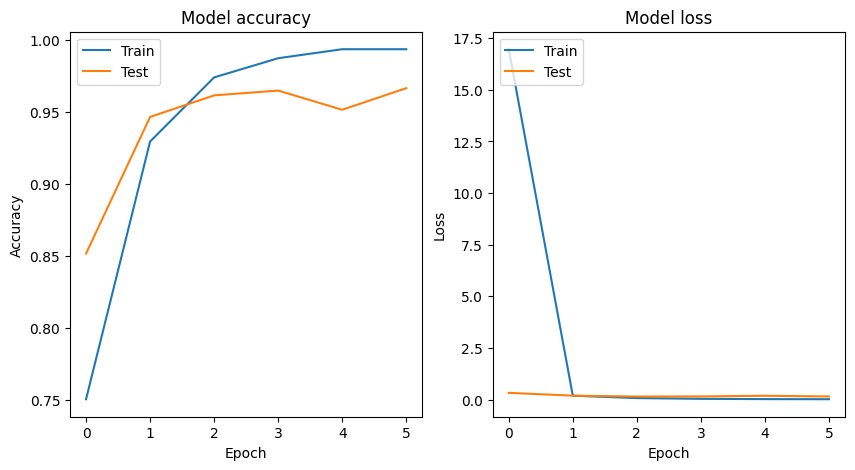

In [ ]:
"""
  This part of the code is visualizing the training and validation accuracy and loss of the model. It creates a figure with two subplots: one for accuracy and one for loss. In each subplot, the training values and validation values are plotted against the epoch number. The subplots are labeled and a legend is added for clarity. Finally, the figure with the subplots is displayed.
"""
func_history_dict = func_history.history  # This line is getting the history of the model training, which includes the training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

plt.figure(figsize=(10,5))  # This line is creating a new figure with a specified size.

plt.subplot(1, 2, 1)  # This line is creating the first subplot in a 1x2 grid of subplots.
plt.plot(func_history_dict['accuracy'])  # This line is plotting the training accuracy values.
plt.plot(func_history_dict['val_accuracy'])  # This line is plotting the validation accuracy values.
plt.title('Model accuracy')  # This line is setting the title of the subplot to 'Model accuracy'.
plt.ylabel('Accuracy')  # This line is setting the label of the y-axis to 'Accuracy'.
plt.xlabel('Epoch')  # This line is setting the label of the x-axis to 'Epoch'.
plt.legend(['Train', 'Test'], loc='upper left')  # This line is adding a legend to the subplot.

plt.subplot(1, 2, 2)  # This line is creating the second subplot in a 1x2 grid of subplots.
plt.plot(func_history_dict['loss'])  # This line is plotting the training loss values.
plt.plot(func_history_dict['val_loss'])  # This line is plotting the validation loss values.
plt.title('Model loss')  # This line is setting the title of the subplot to 'Model loss'.
plt.ylabel('Loss')  # This line is setting the label of the y-axis to 'Loss'.
plt.xlabel('Epoch')  # This line is setting the label of the x-axis to 'Epoch'.
plt.legend(['Train', 'Test'], loc='upper left')  # This line is adding a legend to the subplot.

plt.show()  # This line is displaying the figure with the subplots.
